In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bellabeat-dataset/sleepDay_merged.csv
/kaggle/input/bellabeat-dataset/dailyActivity_merged.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
activity = pd.read_csv('/kaggle/input/bellabeat-dataset/dailyActivity_merged.csv')
sleep = pd.read_csv('/kaggle/input/bellabeat-dataset/sleepDay_merged.csv')

In [4]:
# Clean Data with Specified Date Format
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

# Remove Duplicates
sleep = sleep.drop_duplicates()
activity = activity.drop_duplicates()


In [5]:
# Merge Data
df = pd.merge(activity, sleep, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

In [6]:
# Summary Stats
print(df.describe())

                 Id                   ActivityDate    TotalSteps  \
count  4.100000e+02                            410    410.000000   
mean   4.994963e+09  2016-04-26 11:38:55.609756160   8514.909756   
min    1.503960e+09            2016-04-12 00:00:00     17.000000   
25%    3.977334e+09            2016-04-19 00:00:00   5188.750000   
50%    4.702922e+09            2016-04-27 00:00:00   8913.000000   
75%    6.962181e+09            2016-05-04 00:00:00  11370.250000   
max    8.792010e+09            2016-05-12 00:00:00  22770.000000   
std    2.060863e+09                            NaN   4157.375584   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     410.000000       410.000000                410.000000   
mean        6.012390         6.007366                  0.108867   
min         0.010000         0.010000                  0.000000   
25%         3.592500         3.592500                  0.000000   
50%         6.270000         6.270000               

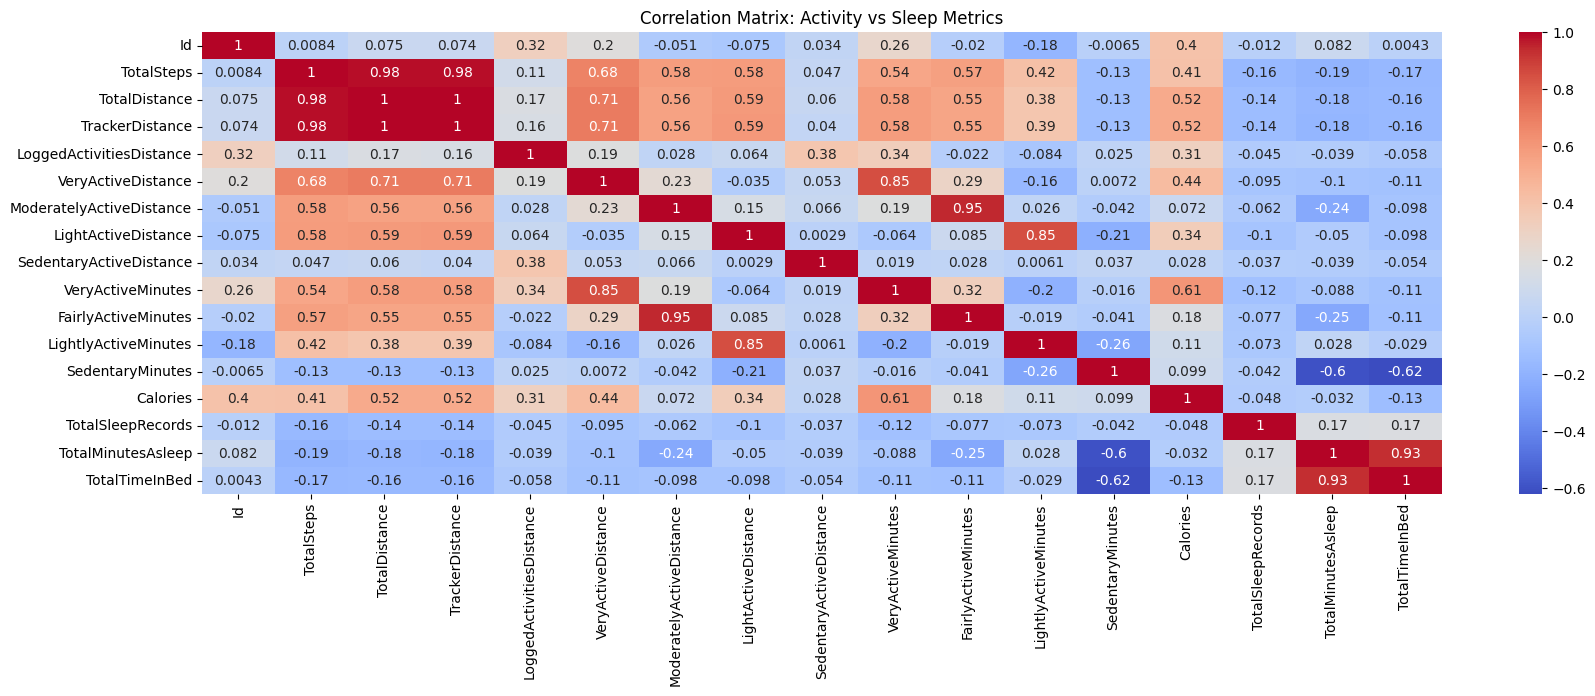

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Activity vs Sleep Metrics")
plt.show()


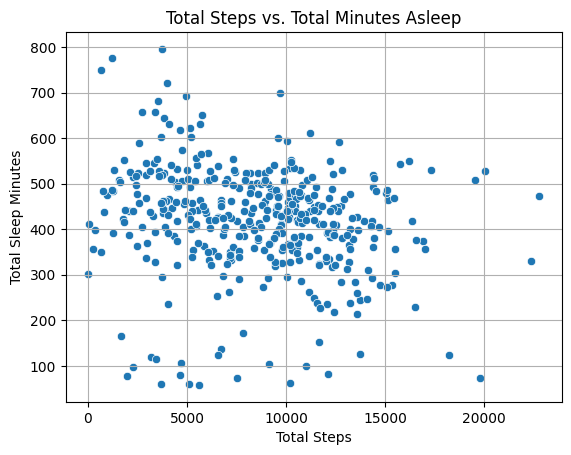

In [8]:
sns.scatterplot(x='TotalSteps', y='TotalMinutesAsleep', data=df)
plt.title("Total Steps vs. Total Minutes Asleep")
plt.xlabel("Total Steps")
plt.ylabel("Total Sleep Minutes")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


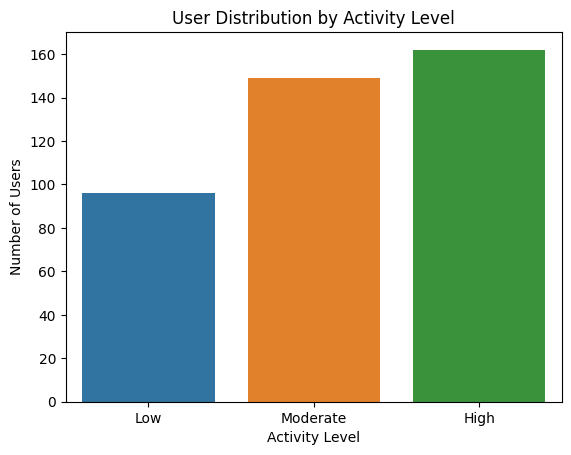

In [9]:
df['ActivityLevel'] = pd.cut(df['TotalSteps'], bins=[0, 5000, 10000, 20000],
                             labels=['Low', 'Moderate', 'High'])

activity_counts = df['ActivityLevel'].value_counts().sort_index()
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.title("User Distribution by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Number of Users")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


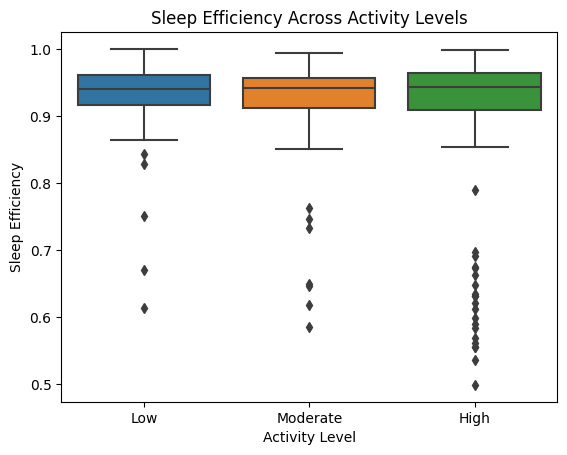

In [10]:
df['SleepEfficiency'] = df['TotalMinutesAsleep'] / df['TotalTimeInBed']

sns.boxplot(x='ActivityLevel', y='SleepEfficiency', data=df)
plt.title("Sleep Efficiency Across Activity Levels")
plt.xlabel("Activity Level")
plt.ylabel("Sleep Efficiency")
plt.show()

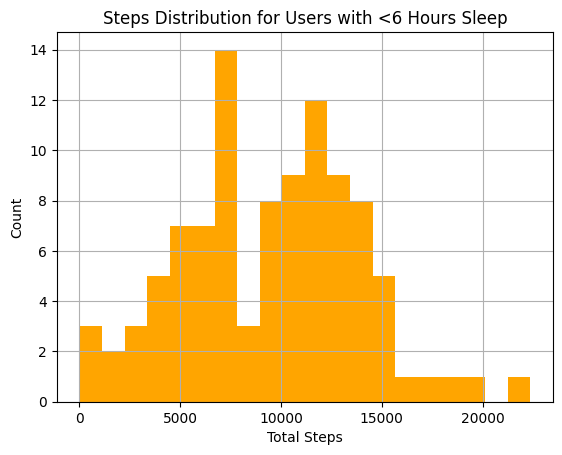

In [11]:
poor_sleepers = df[df['TotalMinutesAsleep'] < 360]

plt.hist(poor_sleepers['TotalSteps'], bins=20, color='orange')
plt.title("Steps Distribution for Users with <6 Hours Sleep")
plt.xlabel("Total Steps")
plt.ylabel("Count")
plt.grid(True)
plt.show()

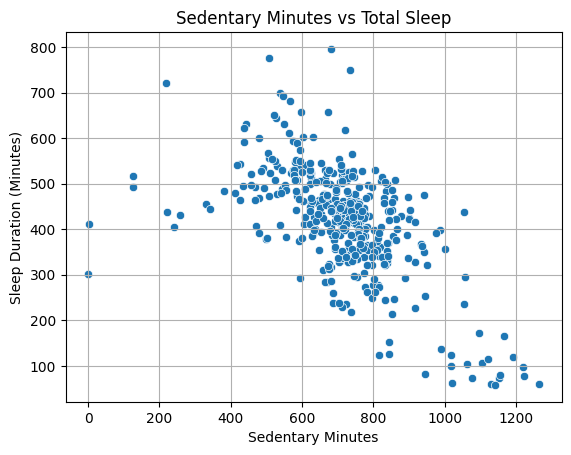

In [12]:
sns.scatterplot(data=df, x='SedentaryMinutes', y='TotalMinutesAsleep')
plt.title('Sedentary Minutes vs Total Sleep')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Sleep Duration (Minutes)')
plt.grid(True)
plt.show()

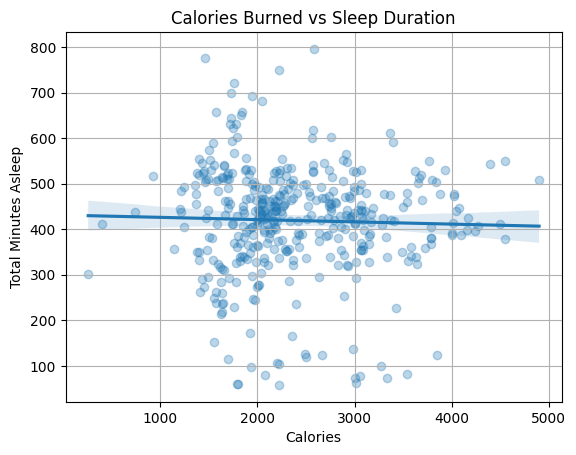

In [13]:
sns.regplot(data=df, x='Calories', y='TotalMinutesAsleep', scatter_kws={'alpha':0.3})
plt.title('Calories Burned vs Sleep Duration')
plt.xlabel('Calories')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


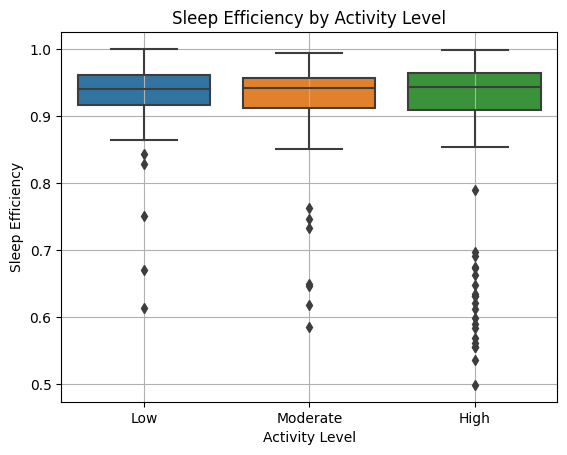

In [14]:
sns.boxplot(x='ActivityLevel', y='SleepEfficiency', data=df)
plt.title('Sleep Efficiency by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Sleep Efficiency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


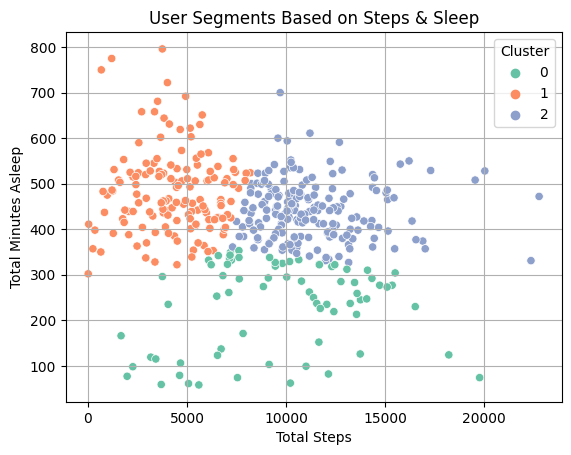

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_data = df[['TotalSteps', 'TotalMinutesAsleep']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

sns.scatterplot(data=df, x='TotalSteps', y='TotalMinutesAsleep', hue='Cluster', palette='Set2')
plt.title('User Segments Based on Steps & Sleep')
plt.xlabel('Total Steps')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)
plt.show()

In [16]:
df['PoorSleep'] = (df['TotalMinutesAsleep'] < 360).astype(int)

features = ['TotalSteps', 'Calories', 'SedentaryMinutes', 'VeryActiveMinutes']
X = df[features].dropna()
y = df.loc[X.index, 'PoorSleep']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        88
           1       0.80      0.46      0.58        35

    accuracy                           0.81       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.81      0.81      0.79       123

